<br/>

# <center> School of Mathematics and Physics </center>

# <center>    DSA8023: Analytics in Action
<br/>
</center>

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# <center>Analython 1 Project: <br/><br/>Suspected EV Customers Challenge from Energia </center>



<br/><br/><br/><br/><br/><br/><br/><br/>

### <p style="text-align: left; width: 50%; float: left"> <br/> Varun Suresh Kumar <br/><br/> Student ID: 40364111 <br/><br/> vsureshkumar01@qub.ac.uk</p><p style="text-align: right; width: 50%; float: right">  <br/><br/> Submitted on: 18/14/2023 <br/><br/> Page Count: 9 </p>


<br/>

## Table of Contents:

1. Introduction and Background</a>
2. Research Objective</a>
3. Exploratory Data Analysis (EDA)</a>
    <br/>3.1 Glimpse of Data</a>
    <br/>3.2 Descriptive Statistics</a>
    <br/>3.3 Categorizing target class</a>
    <br/>3.4 Distribution and plotting features</a>
    <br/>3.5 Correlation</a>
4. Methodology</a>
5. Comparison of model performance</a>
6. Conclusion</a>
    


## 1. Introduction and Background

Based on market research, Ireland (ROI) has 70,000 Electric Vehicle(EV) Customers who own an EV; out of which Energia has 10% of the market share. Around 2.4K EV Customers are identified from Energia database as they are part of the EV Tariff. 
This analysis is target towards identifying the remaining share of EV Customers using the bimonthly electrical billing data of customers from January 2021 to January 2023.

This dataset consists of information on their account IDs, customers start date, their EV contract start and end dates, their title, EV contract type(New or Old), age band, channel through which they signedup and Geo-financial classification.

The following report will consist of Exploratory Data Analysis of the dataset, steps involved in cleaning / classification of the data, the analysis of the data against Logistic Regression modal(3 variants), Decision Tree algorithm modal and finally the recommendations and conclusions inferred from the analysis. This analysis is performed in Python language using sklearn library. 

## 2. Research Objective:
This analysis aims at developing a statistical modal to predict and classify the customers whether they use a EV vehicles or not.


<a id='eda'></a>
## 3. Exploratory Data Analysis (EDA)


<a id='31'></a>
### 3.1 Glimpse of Data  

<a id='31'></a>
### Check the data  


In [49]:
# #reading and concatinating customer data

raw_1 = pd.read_excel('D:/UK/assignment/DSA8023/WB1_Energia_Challenge_March_2023_Data.xlsx', sheet_name=1)
raw_2 = pd.read_excel('D:/UK/assignment/DSA8023/WB2_Energia_Challenge_March_2023_Data.xlsx', sheet_name=1)
raw_d = pd.concat([raw_1, raw_2])

print('Shape of the dataset is {}'.format(raw_d.shape))

Shape of the dataset is (186558, 25)


**Features present in the dataset:**

In [530]:
print('Features present in the dataset:')
',   '.join(raw_d.columns.to_list())

In [539]:
print('Categorical information present in the dataset:')

categorical = ['saStatus',   'agedBand',   'signedUpGroup',   'title',   'mosaicType',   'EV',   'EV_New_or_Old' ]
',   '.join(categorical)


Categorical information present in the dataset:


'saStatus,   agedBand,   signedUpGroup,   title,   mosaicType,   EV,   EV_New_or_Old'

In [540]:
billing_months = ['bill_1_2021', 'bill_2_2021',
       'bill_3_2021', 'bill_4_2021', 'bill_5_2021', 'bill_6_2021',
       'bill_1_2022', 'bill_2_2022', 'bill_3_2022', 'bill_4_2022',
       'bill_5_2022', 'bill_6_2022', 'bill_1_2023']

print('Categorical information present in the dataset:')
', '.join(billing_months)

Categorical information present in the dataset:


'bill_1_2021, bill_2_2021, bill_3_2021, bill_4_2021, bill_5_2021, bill_6_2021, bill_1_2022, bill_2_2022, bill_3_2022, bill_4_2022, bill_5_2022, bill_6_2022, bill_1_2023'

**Unique Values in categorical features**

In [31]:
def checkCateoricalInfo(data, cols):
    for col in cols:
        unique = data[col].unique()
        print('{}({}) - {}'.format(col, len(unique), unique));
        print()

checkCateoricalInfo(raw_d, categorical_columns)

title(10) - ['Mr' 'Ms' 'Mrs' ' ' 'Miss' 'Dr' 'Mr & Mrs' nan 'Rev' 'Cllr']

mosaicType(44) - [nan 'F17' 'G18' 'K31' 'M37' 'G19' 'N42' 'L33' 'B04' 'C09' 'M38' 'E14'
 'B06' 'A03' 'J29' 'A02' 'C07' 'F15' 'N43' 'H22' 'K30' 'C08' 'J28' 'L35'
 'E13' 'B05' 'J26' 'N40' 'A01' 'H23' 'K32' 'D10' 'N41' 'G20' 'I24' 'M39'
 'F16' 'D11' 'J27' 'L34' 'H21' 'L36' 'I25' 'D12']

agedBand(9) - ['41 to 50' 'Unclassified' '51 to 60' '61 to 70' '25 to 40' '70+'
 '19 to 24' nan '18 & Under']

saStatus(1) - ['Active']

signedUpGroup(6) - ['PCW' 'Telesales' 'Other' 'Web' 'Field Sales' 'OBS']



### 3.2 Descriptive Statistics

In [101]:
raw_d.describe(percentiles=[.25, .5,.75]).transpose()

,count,mean,std,min,25%,50%,75%,max
accountID,186558.0,93278.500000,53854.800097,0.0,46639.25,93278.5,139917.75,186557.0
bill_1_2021,186558.0,466.917100,718.094048,0.0,0.00,0.0,806.00,8914.0
bill_2_2021,186558.0,562.115112,808.298450,0.0,0.00,221.0,876.00,9599.0
bill_3_2021,186558.0,513.730224,667.484855,0.0,0.00,350.0,817.00,9191.0
bill_4_2021,186558.0,466.354419,562.397514,0.0,0.00,374.0,732.00,9654.0
bill_5_2021,186558.0,463.413131,534.612340,0.0,0.00,387.0,721.00,9499.0
bill_6_2021,186558.0,577.303464,635.093880,0.0,0.00,488.0,872.00,8376.0
bill_1_2022,186558.0,725.422035,786.465344,0.0,0.00,596.0,1068.00,9361.0
bill_2_2022,186558.0,677.365972,741.113552,0.0,0.00,549.0,957.00,9551.0
bill_3_2022,186558.0,651.451716,640.593475,0.0,219.00,548.0,892.00,9840.0



### 3.3 Categorizing target class: 

From this sample of **1,86,558 Energia customers**, there are **2,516 known EV** customers. The proportion of EV customers in the dataset is **1.35% (very low)** so this is **highly imbalanced dataset**.

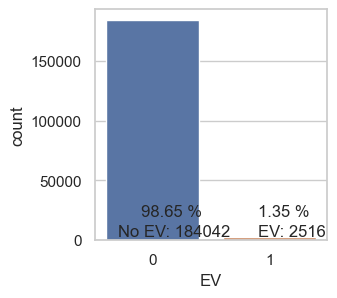

In [97]:
visualizeFeatureCount(raw_d.replace({'EV': {'N':0, 'Y': 1}}), sizeX = 3, sizeY = 3)

## 3.4 Distribution and plotting features

**Distribution of Signed Up Group type**

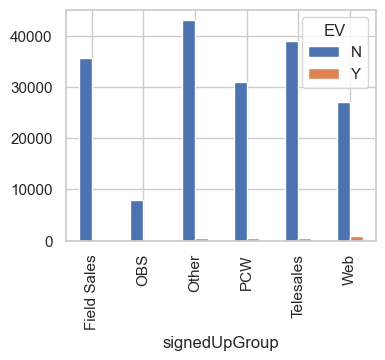

In [21]:
pd.crosstab(raw_d["signedUpGroup"], raw_d["EV"]).plot( kind = "bar", figsize=(3,3));

**Distribution of Age band type**

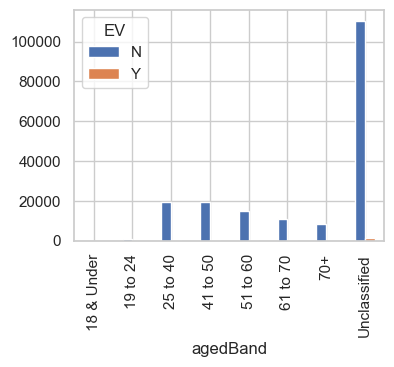

In [22]:
pd.crosstab(raw_d["agedBand"], raw_d["EV"]).plot( kind = "bar", figsize=(3,3));

<br/><br/><br/><br/><br/>

**Distribution of Title type**

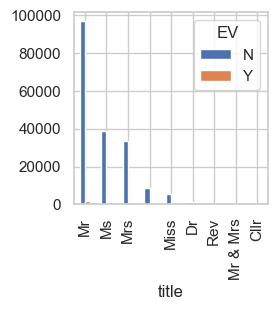

In [106]:
pd.crosstab(raw_d["title"], raw_d["EV"]).sort_values(by='N', ascending=False).plot( kind = "bar", figsize=(2.5,2.5));

**Distribution of mosaic type**

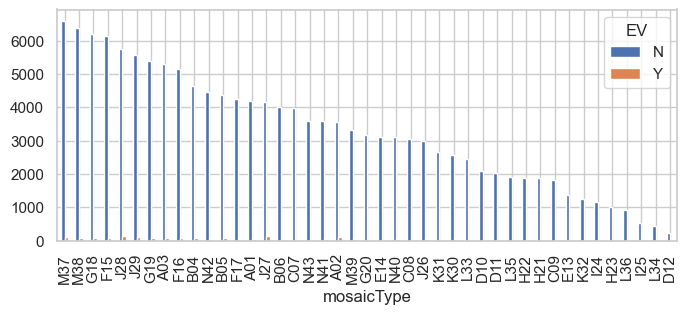

In [104]:
pd.crosstab(raw_d["mosaicType"], raw_d["EV"]).sort_values(by='N', ascending=False).plot( kind = "bar", figsize=(8, 3));

**Pearson correlation coefficient of categorical variables**

In [46]:
def r_pvalues(df):
    cols = pd.DataFrame(columns=df.columns)
    p = cols.transpose().join(cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = round(pearsonr(tmp[r], tmp[c])[0], 4)
    return p

#use custom function to calculate p-values
r_pvalues(categorized_data[['agedBand',   'signedUpGroup',   'title',   'mosaicType',   'EV',   'EV_New_or_Old' ]])

,agedBand,signedUpGroup,title,mosaicType,EV,EV_New_or_Old
agedBand,1.0,-0.0395,0.0063,0.0017,0.0026,0.0026
signedUpGroup,-0.0395,1.0,0.0192,-0.1053,0.0557,0.0557
title,0.0063,0.0192,1.0,0.0228,-0.0209,-0.0209
mosaicType,0.0017,-0.1053,0.0228,1.0,0.0073,0.0073
EV,0.0026,0.0557,-0.0209,0.0073,1.0,1.0
EV_New_or_Old,0.0026,0.0557,-0.0209,0.0073,1.0,1.0


Pearson correlation measures the strength of the relationship between EV and other variables, title has weakly negative correlation, ageband and signed up group has moderately positive correlation and mosaic type has strongly positive correlation

## 3.5 Correlation

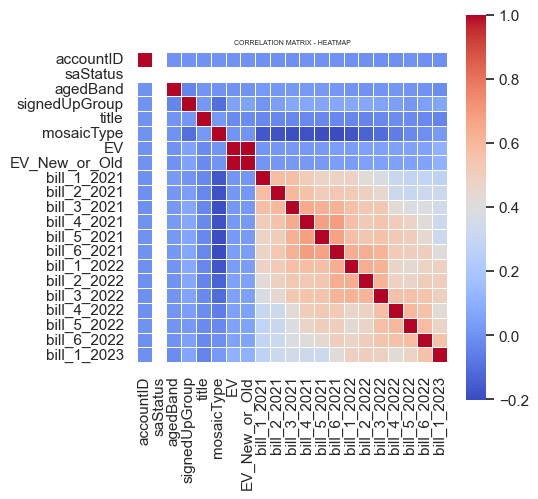

In [110]:
def plot_corr_plot(ds):
    corr = ds.corr(numeric_only=True) # .corr is used to find corelation
    f,ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
                xticklabels= True, yticklabels= True
                ,cmap="coolwarm", linewidths=.5, ax=ax, )
    plt.title('CORRELATION MATRIX - HEATMAP', size=5);

categorized_data = raw_d.copy()

le = LabelEncoder()
 
# keeping nan values in title, agedband as they have relatively less effect on EV classification
categorized_data['title'] = le.fit_transform(categorized_data['title'])
categorized_data['mosaicType'] = le.fit_transform(categorized_data['mosaicType'])
categorized_data['agedBand'] = le.fit_transform(categorized_data['agedBand'])
categorized_data['signedUpGroup'] = le.fit_transform(categorized_data['signedUpGroup'])
categorized_data['saStatus'] = le.fit_transform(categorized_data['saStatus'])


# manually assigning numeric values to EV related categories
rename_props = { 'EV': {'N': 0, 'Y': 1},
                  'EV_New_or_Old': {'Non-EV Customers': 0, 'Switched to EV': 1, 'New EV Customer': 1}} 

categorized_data = categorized_data.replace(rename_props)

    
plot_corr_plot(categorized_data)

Based on the Correlation plot we assume there is considerable correlation between billing information and some relation between categorical variables like signedUpGroup, agedBand and title. 

In [114]:
# # check distribution of billing features before transforming
# plot_hist_plots(cleaned_data, billing_months, fig_size=6)


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

## 4. Methodology

Based on the fact that, if a reading for the billing cycle is missed, the reading will be included in the next billing cycle. So average reading value is applied for previous and current month. Only one intermittent zero value is filled this way Consecutive zero values are ignored. The categorical variables are mapped into appropriate classes. The rows with NaN and zero values in the billing columns are dropped. 

In [50]:
def average_missing_months(x):
    for index, month in enumerate(billing_months[:-1]):
        next_month = billing_months[index+1]
        if x[month] == 0:
            if(x[next_month] != 0):
                x[month] = x[next_month] / 2
                x[next_month] = x[next_month] / 2
            else:
                break
    return x

missing_months_handled = categorized_data.apply(average_missing_months, axis=1)

In [69]:
t = pd.DataFrame(columns=['Raw', 'Missing Handled', '% Reduced'])

t['Raw'] = ((categorized_data[billing_months])== 0).sum()
t['Missing Handled'] = ((missing_months_handled[billing_months])== 0).sum()
t['% Reduced'] = round((t['Raw'] - t['Missing Handled']) / t['Raw'], 4 ) * 100

t.style.set_caption('Table 1.1 Handling missing values through averaging')


,Raw,Missing Handled,% Reduced
bill_1_2021,103721,83055,19.920000
bill_2_2021,87688,83263,5.050000
bill_3_2021,78559,73485,6.460000
bill_4_2021,69810,66461,4.800000
bill_5_2021,65513,61108,6.720000
bill_6_2021,59636,55887,6.290000
bill_1_2022,55811,49693,10.960000
bill_2_2022,50109,44183,11.830000
bill_3_2022,34100,31427,7.840000
bill_4_2022,25629,22300,12.990000


In [118]:
cols_to_delete = ['StartDate','ContractStartDateEV','contractStartDate','contractEndDate','saStatus', 'accountID']
if missing_months_handled.columns.isin(cols_to_delete).any():
    missing_months_handled = missing_months_handled.drop(columns=cols_to_delete)

def get_cleaned_data(df, is_zero_bill_value_allowed):
    if is_zero_bill_value_allowed:
        df['zero_count'] = df[billing_months].isin([0]).sum(axis=1)
        cleaned_data = df.copy()
    else:
        cleaned_data = df[~df[billing_months].isin([0]).any(axis=1)]
    
    return cleaned_data
cleaned_data = get_cleaned_data(missing_months_handled, is_zero_bill_value_allowed = False)


# visualizeFeatureCount(cleaned_data, sizeX = 2.5, sizeY = 2.5)   

cleaned_data['EV'].value_counts()

print('Dataset shape after cleaning:')
print('EV customers       : {}  ({}%)'.format(len(cleaned_data[cleaned_data.EV ==1]), round(len(cleaned_data[cleaned_data.EV ==1]) / len(cleaned_data), 4)*100 ))
print('Non - EV customers : {} ({}%)'.format(len(cleaned_data[cleaned_data.EV ==0]), round(len(cleaned_data[cleaned_data.EV ==0]) / len(cleaned_data), 4)*100 ))

Dataset shape after cleaning:
EV customers       : 1059  (1.08%)
Non - EV customers : 96942 (98.92%)


From the above table it is evident that our strategy in handling missing month reading has signnificant reduction in certain months

In [123]:
# check distribution of billing features before transforming
plot_hist_plots(cleaned_data, cleaned_data.columns, fig_size=12)

In [126]:
import warnings
warnings.filterwarnings(action='once')

from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

In [78]:
#test Graph
import matplotlib as mpl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # used for plot interactive graph.
import seaborn.objects as so
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split # to split the data into two parts
from collections import Counter
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.

from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from scipy.stats import boxcox
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

sns.set_theme(style="whitegrid")
# from xgboost import XGBClassifier

from tabulate import tabulate

In [79]:
# based on the fact that ifn one reading is missed for a particular month, the reading will be accumulated to next month.
# the reading is averaged between missing and accumulated months.
# only one missed month is accepted thus eleminating rows with consecutive zeros
# end result will have no zero readings
def average_missing_months(x):
    for index, month in enumerate(billing_months[:-1]):
        next_month = billing_months[index+1]
        if x[month] == 0:
            if(x[next_month] != 0):
                x[month] = x[next_month] / 2
                x[next_month] = x[next_month] / 2
            else:
                break
    return x



In [80]:
def visualizeFeatureCount(dataset, feature = 'EV', sizeX = 7, sizeY =7):
    totalData = len(dataset)
    hasFeature = dataset[feature].sum()
    hasNoFeature = totalData - hasFeature

    hasFeature_per = round(hasFeature/totalData * 100, 2)
    hasNoFeature_per = round(hasNoFeature/totalData * 100, 2)

    plt.figure(figsize=(sizeX,sizeY))
    sns.countplot(data = dataset, x=feature)
    plt.annotate('No {}: {}'.format(feature, hasNoFeature), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
    plt.annotate('{}: {}'.format(feature, hasFeature), xy=(0.7, 15000), xytext=(0.9, 3000), size=12)
    plt.annotate(str(hasNoFeature_per)+" %", xy=(-0.3, 15000), xytext=(-0.1, 20000), size=12)
    plt.annotate(str(hasFeature_per)+" %", xy=(0.7, 15000), xytext=(0.9, 20000), size=12)
    plt.show()
    
    
def predict_and_visualize(model, class_col, dataset=None, class_col_predicted= 'EV_predicted'):
    
    if dataset is None:
        x = df.copy()
        
    else:
        x = dataset.copy()
        
    x= x.drop(columns=[class_col])
    x[class_col_predicted] = model.predict(x)
    visualizeFeatureCount(x, feature='EV_predicted')
    

def plot_hist_plots(t_data, t_features, fig_size= 8):
    f = plt.figure(figsize=(fig_size,fig_size))
    for i, feature in enumerate(t_features):
        t = f.add_subplot(round(len(t_features)/3) + 1,3, i+1)
        sns.histplot(t_data[feature])
        t.title.set_text(feature)
    plt.show();

def plot_corr_plot(ds):
    corr = ds.corr(numeric_only=True) # .corr is used to find corelation
    f,ax = plt.subplots(figsize=(8, 7))
    sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
                xticklabels= True, yticklabels= True
                ,cmap="coolwarm", linewidths=.5, ax=ax)
    plt.title('CORRELATION MATRIX - HEATMAP', size=18);



In [14]:
# ignore - Applying log transformation to fix right skewness in billing period distribution
# sqrt_t_data = cleaned_data.copy()

# for month in billing_months:
#     sqrt_t_data[month] = np.sqrt(sqrt_t_data[month])

# plot_hist_plots(sqrt_t_data, billing_months)

In [478]:
# perform logistic regression

from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning


def perform_sampling(x_train, y_train, y_test, sampling=None):
    if sampling:
        print('Training set shape: {}'.format(Counter(y_train)))

        if sampling == 'under':
            from imblearn.under_sampling import NearMiss 
            sampler = NearMiss(version=1, n_neighbors=3)
        elif sampling == 'over':
            from imblearn.over_sampling import SMOTE 
            sampler = SMOTE(random_state=42)

        x_train, y_train = sampler.fit_resample(x_train, y_train)
        print('Training set after sampling: {}'.format(Counter(y_train)))
        
    return x_train, y_train

@ignore_warnings(category=ConvergenceWarning)
def perform_logistic_reg(data, class_col, sampling=None, solver='lbfgs', weight = None, return_metrics = False):
    x = data.drop(class_col, axis=1)  
    y = data[class_col]

    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, stratify=y, random_state=42)
    
    if sampling:
        X_train, y_train = perform_sampling(X_train, y_train,y_test,  sampling)

    LR = LogisticRegression(C=0.00005, random_state=0, solver=solver ,class_weight = weight)
    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)
    metrics = get_metrics(y_pred, X_test, y_test, LR, x, y, sampling, modal_name='Linear Regression')
    
    return LR, metrics
    
def get_metrics(y_pred, X_test, y_test, LR, x, y, sampling = None, modal_name = ''):
    ## 5-fold cross-validation 
    cv_scores =cross_val_score(LR, x, y, cv=10)

    modal_report = classification_report(y_test, y_pred, output_dict = True)
    # Print the 5-fold cross-validation scores
    print()
    print(classification_report(y_test, y_pred))
    print()
    print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
          ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

    plt.figure(figsize=(4,3))
    ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
    sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
                xticklabels = ['No EV', 'EV'], 
                yticklabels = ['No EV', 'EV'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion Matrix - {} - {}".format(modal_name, sampling));
    
    total1=sum(sum(ConfMatrix))
    #####from confusion matrix calculate accuracy
    accuracy = metrics.accuracy_score(y_pred,y_test)
    print('Accuracy:', accuracy)
    sensitivity = ConfMatrix[0,0]/(ConfMatrix[0,0]+ConfMatrix[0,1])
    print('Sensitivity : ', sensitivity )
    specificity = ConfMatrix[1,1]/(ConfMatrix[1,0]+ConfMatrix[1,1])
    print('Specificity : ', specificity)
#     ['accuracy', 'sensitivity', 'specificity', 'recall(0)', 'f1-score(0)', 'recall(1)', 'f1-score(1)' ]
    return np.array([accuracy, sensitivity, specificity, modal_report['0']['recall'], modal_report['0']['f1-score'], modal_report['1']['recall'], modal_report['1']['f1-score'] ]).round(4)
     

modal_score_cols = ['accuracy', 'sensitivity', 'specificity', 'f1-score(0)', 'f1-score(1)' ]
modal_scores = pd.DataFrame()
modal_scores['Metrics'] = modal_score_cols

In [87]:
LR_over, LR_over_metrics = perform_logistic_reg(cleaned_data, class_col='EV', sampling='over')
predict_and_visualize(LR2, 'EV', dataset=df)

modal_scores['Logistic Regression(Up-sampled)'] = LR_over_metrics

In [88]:
LR_under, LR_under_metrics = perform_logistic_reg(cleaned_data, class_col='EV', sampling='under')
predict_and_visualize(LR_under, 'EV', dataset=df)

modal_scores['Logistic Regression(Down-sampled)'] = LR_under_metrics

In [89]:
LR_weighted, LR_under_metrics = perform_logistic_reg(cleaned_data, class_col='EV', sampling=None, weight={0: 1, 1: 99})
predict_and_visualize(LR_weighted, 'EV', dataset=df)

modal_scores['Logistic Regression(Weight)'] = LR_under_metrics

In [48]:
# # anayzing with scaled data and perform LR
def scale_data_standard_scaler(data, feature_cols):
    scaled_data = data.copy()
    features = scaled_data[feature_cols]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    scaled_data[feature_cols] = features
    return scaled_data

# scaled_data = scale_data_standard_scaler(cleaned_data, billing_months)
# LR4 = perform_logistic_reg(scaled_data, class_col='EV' )
# predict_and_visualize(LR4,'EV', dataset=df)

In [18]:
# Perform RFE and find important features 

@ignore_warnings(category=ConvergenceWarning)
def perform_RFE(dataset, class_col='EV'):
    test_df_1 = dataset.copy()

    x = test_df_1.drop(class_col, axis=1)  
    y = test_df_1[class_col]

    model = LogisticRegression()
    rfe_stand = RFE(model, n_features_to_select = 9 )
    fit_stand = rfe_stand.fit(x, y)
    print("St Model Num Features:", fit_stand.n_features_)
    #print("St Model Selected Features:", fit_stand.support_)
    print("Std Model Feature Ranking:", fit_stand.ranking_)
    # calculate the score for the selected features
    score_stand = rfe_stand.score(x,y)
#     print("Standardized Model Score with selected features is: %f (%f)" % (score_stand.mean(), score_stand.std()))
    feature_names = np.array(x.columns)
    print('Most important features (RFE): %s'% feature_names[rfe_stand.support_])
    
    return feature_names[rfe_stand.support_]

In [19]:
# Analysing important features with RFE

RFE_data = cleaned_data.copy()
# RFE_data = scale_data_standard_scaler(RFE_data, billing_months)

imp_cols = perform_RFE(RFE_data)

imp_data = RFE_data[imp_cols]
imp_data['EV'] = cleaned_data['EV'].to_numpy()
imp_LR = perform_logistic_reg(imp_data, class_col='EV')
predict_and_visualize(imp_LR, 'EV', dataset = df[[imp_cols]])

In [90]:
## Analysing with Decision tree algorithm

DT_data = cleaned_data.copy()

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)

x = DT_data.drop('EV', axis=1)  
y = DT_data['EV']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, stratify=y, random_state=42)
    
X_train, y_train = perform_sampling(X_train, y_train, y_test, sampling='under')

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 8, 
                                     max_features= 4, min_samples_leaf= 6, 
                                     random_state=0)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

DT_metrics = get_metrics(y_pred, X_test, y_test, Tree, x, y, modal_name='DecisionTree Classifier')
predict_and_visualize(Tree ,  'EV', dataset=df[df.EV == 0])

modal_scores['Decision Tree'] = DT_metrics

In [121]:
# predict_and_visualize(Tree ,  'EV', dataset=df[df.EV == 0])

In [91]:
# # ## Random forest classification

RF_data = cleaned_data.copy()

param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

x = RF_data.drop('EV', axis=1)  
y = RF_data['EV']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, stratify=y, random_state=42)

X_train, y_train = perform_sampling(X_train, y_train, y_test, sampling='under')

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(x, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))


Ran = RandomForestClassifier(criterion= 'entropy', max_depth= 5, 
                                     max_features= 6, n_estimators= 200, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

RF_metrics = get_metrics(y_pred, X_test, y_test, Ran, x, y, modal_name="Random Forest")

modal_scores['Random forest Metrics'] = RF_metrics

In [22]:
# SVM_data = cleaned_data.copy()

# x = SVM_data.drop('EV', axis=1)  
# y = SVM_data['EV']

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# X_train, y_train = perform_sampling(X_train, y_train, y_test, 'under')

# SVM_Model = SVC(kernel='linear', C=1.0, class_weight='balanced')

# SVM_Model.fit(X_train,y_train)

# y_pred = SVM_Model.predict(X_test)
# print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

# get_metrics(y_pred, X_test, y_test, SVM_Model, x, y, modal_name="SVM")

# print (f'Accuracy - : {SVM_Model.score(x,y):.3f}')


In [92]:
## KNN classification

KNN_data = cleaned_data.copy()

# KNN_data = scale_data_standard_scaler(KNN_data, KNN_data.columns)

# for month in KNN_data.columns:
#     KNN_data[month] = boxcox(KNN_data[month])[0]
    
x = KNN_data.drop('EV', axis=1)  
y = KNN_data['EV']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, stratify=y, random_state=42)

X_train, y_train = perform_sampling(X_train, y_train, y_test, sampling='under')

from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))


y_pred = knn.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

KNN_metrics = get_metrics(y_pred, X_test, y_test, Ran, x, y, modal_name="KNN classifier")

modal_scores['KNN - modal'] = KNN_metrics

In [120]:
predict_and_visualize(knn ,  'EV', dataset=df[df.EV == 0])
# KNN_metrics

In [93]:

GraBo = cleaned_data.copy()

# KNN_data = scale_data_standard_scaler(KNN_data, KNN_data.columns)

# for month in KNN_data.columns:
#     KNN_data[month] = boxcox(KNN_data[month])[0]
    
x = GraBo.drop('EV', axis=1)  
y = GraBo['EV']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, stratify=y, random_state=42)

X_train, y_train = perform_sampling(X_train, y_train, y_test, sampling='over')

from sklearn.ensemble import GradientBoostingClassifier
gb = XGBClassifier(scale_pos_weight=99)
gb.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(gb.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gb.score(X_test, y_test)))
      
y_pred = gb.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

GR_BO_metrics = get_metrics(y_pred, X_test, y_test, Ran, x, y, modal_name="Gradient Boosting")

modal_scores['Gradient Boosting'] = GR_BO_metrics

## 5. Comparison of model performance

In [130]:
modal_scores

In [128]:
ROC = cleaned_data.copy()

x = ROC.drop('EV', axis=1)  
y = ROC['EV']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, stratify=y, random_state=100)


y_pred_proba_RF = Tree.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_DT = LR_over.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_DT)

y_pred_proba_LR = LR_under.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_LR)

mod, met = LR_weighted

y_pred_proba_LRS = mod.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba_LRS)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba_LRS)

y_pred_proba_LRimp = knn.predict_proba(X_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba_LRimp)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba_LRimp)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Decision Tree, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="LR over, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="LR under, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="Gradient Boost, auc="+str(round(auc3,2)))
plt.plot(fpr5,tpr5,label="KNN, auc="+str(round(auc3,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);


## 6. Conclusion

For the presented dataset we hve implemented Logistic Regression (Up-sampled), Decision Tree, Logistic Regression(Weighted), KNN - modal, Logistic Regression (Down-sampled), Random forest Metrics, Gradient Boosting algorithms and performed statistical analysis. Comparing the accuracy of these models, Logistic regression with upsampled modal has the relatively better accuracy of **0.8140**, followed by descion tree with **0.7782** accuracy. 

No of customers identified from Non EV class:

Decision Tree Algorithm    -  34,368(18.67%) 
<br/>
LR Upsampled Algorithm   -  48,480(25.99%)

In [77]:
from IPython.display import HTML

HTML('''<script>
show=true; 
function code_toggle() {
 if (show){
 $('div.input').hide();
 } else {
 $('div.input').show();
  $('bdi').show();
   $('.prompt').show();
 }
 show = !show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle code blocks."></form>''')